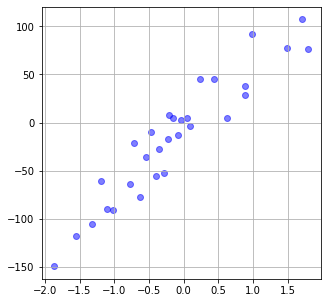

In [1]:
### アルゴリズム
# --------
# 線形回帰
# --------
from sklearn.datasets import make_regression
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# データセット作成
X, y = make_regression(
    random_state = 3,
    n_features = 1,
    noise = 20,
    n_samples = 30
)

# 散布図
df = pd.DataFrame(X)
plt.figure(figsize=(5, 5))
plt.scatter(df[0], y, color='b', alpha=0.5)
plt.grid()
plt.show()

accuracy 84.98344774428922%


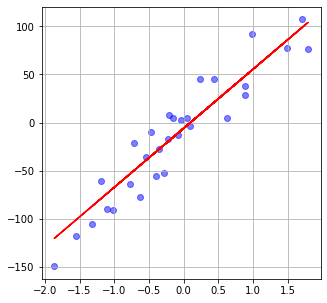

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 訓練データで線形回帰の学習モデル作成
model = LinearRegression()
model.fit(X_train, y_train)

# テストデータで正解率を調べる
pred = model.predict(X_test)
score = r2_score(y_test, pred)
print('accuracy ' + str(score*100) + '%')

# 散布図, 予測線
plt.figure(figsize=(5, 5))
plt.scatter(X, y, color='b', alpha=0.5)    # 散布図
plt.plot(X, model.predict(X), color='red') # 予測線
plt.grid()
plt.show()


accuracy 33.025689869605145%


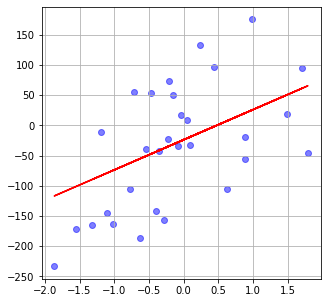

In [3]:
# ばらつきが大きい(相関関係が弱い)場合

# データセット作成
X, y = make_regression(
    random_state = 3,
    n_features = 1,
    noise = 80,      # ノイズ80
    n_samples = 30
)

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 訓練データで線形回帰の学習モデル作成
model = LinearRegression()
model.fit(X_train, y_train)

# テストデータで正解率を調べる
pred = model.predict(X_test)
score = r2_score(y_test, pred)
print('accuracy ' + str(score*100) + '%')

# 散布図, 予測線
plt.figure(figsize=(5, 5))
plt.scatter(X, y, color='b', alpha=0.5)    # 散布図
plt.plot(X, model.predict(X), color='red') # 予測線
plt.grid()
plt.show()

In [4]:
## グラフ描画用関数
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_boundary(model, X, Y, target, xlabel, ylabel):
    cmap_dots = ListedColormap(['#1f77b4','#ff7f0e','#2ca02c'])
    cmap_fills = ListedColormap(['#c6dcec','#ffdec2','#cae7ca'])
    plt.figure(figsize=(5, 5))
    if model:
        XX, YY = np.meshgrid(
            np.linspace(X.min()-1, X.max()+1, 200),
            np.linspace(Y.min()-1, Y.max()+1, 200),
        )
        pred = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
        plt.pcolormesh(XX, YY, pred, cmap=cmap_fills, shading='auto')
        plt.contour(XX, YY, pred, colors="gray")
    
    plt.scatter(X, Y, c=target, cmap=cmap_dots)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    

          0         1
0  3.359415  5.248267
1  2.931100  0.782556
2  1.120314  5.758061
3  2.876853  0.902956
4  1.666088  5.605634
[0 1 0 1 0 0 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 1 1
 1 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 0
 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1
 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1
 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1
 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 1
 1 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1
 0 1 1 0]


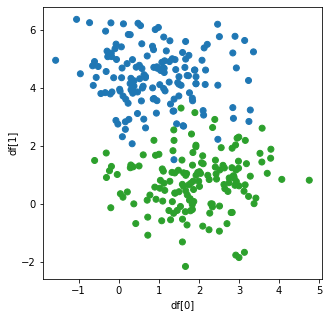

In [5]:
# --------
#  ロジスティック回帰
# --------

# データセット自動生成
from sklearn.datasets import make_blobs
import pandas as pd

X, y = make_blobs(
    random_state=0,
    n_features=2,
    centers=2,
    cluster_std=1,
    n_samples=300
)

df = pd.DataFrame(X)
print(df.head())
print(y)

# 散布図描画
plot_boundary(None, df[0], df[1], y, "df[0]", "df[1]")


accuracy 96.0%


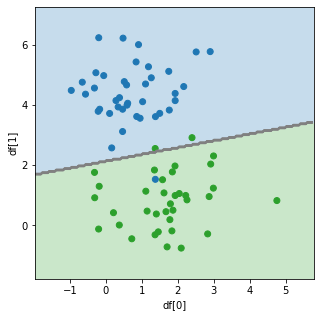

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 訓練データでロジスティック回帰の学習モデル作成
model = LogisticRegression()
model.fit(X_train, y_train)

# テストデータで正解率を調べる
pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print('accuracy ' + str(score*100) + '%')

# テストデータで学習モデルの分類を描画
df = pd.DataFrame(X_test)
plot_boundary(model, df[0], df[1], y_test, "df[0]", "df[1]")

accuracy 82.66666666666667%


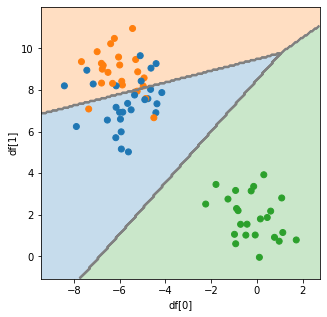

In [7]:
## ３つに分類する場合
X, y = make_blobs(
    random_state = 5,
    n_features = 2,
    centers = 3,
    cluster_std = 1,
    n_samples = 300,
)

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 訓練データでロジスティック回帰の学習モデル作成
model = LogisticRegression()
model.fit(X_train, y_train)

# テストデータで正解率を調べる
pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print('accuracy ' + str(score*100) + '%')

# テストデータで学習モデルの分類を描画
df = pd.DataFrame(X_test)
plot_boundary(model, df[0], df[1], y_test, "df[0]", "df[1]")




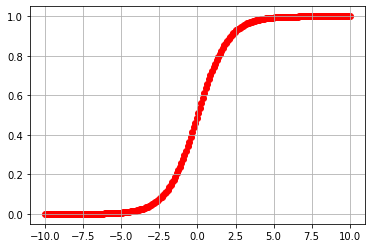

In [8]:
## シグモイド関数
xx = np.linspace(-10, 10, 200)
yy = 1 / (1 + np.exp(-xx))

plt.scatter(xx, yy, color='r')
plt.grid()
plt.show()

accuracy 89.60000000000001%


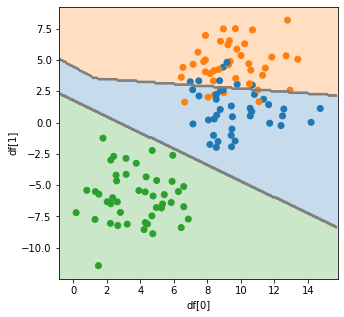

In [9]:
# --------
# SVM(サポートベクターマシン)
# --------

from sklearn import svm

# データセット作成
X, y = make_blobs(
    random_state = 4,
    n_features = 2,
    centers = 3,
    cluster_std = 2,
    n_samples = 500
)

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 訓練データでSVMの学習モデル作成
model = svm.SVC(kernel='linear') # 線形
model.fit(X_train, y_train)

# テストデータで正解率を調べる
pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print('accuracy ' + str(score*100) + '%')

# テストデータで学習モデルの分類を描画
df = pd.DataFrame(X_test)
plot_boundary(model, df[0], df[1], y_test, "df[0]", "df[1]")

accuracy 85.6%


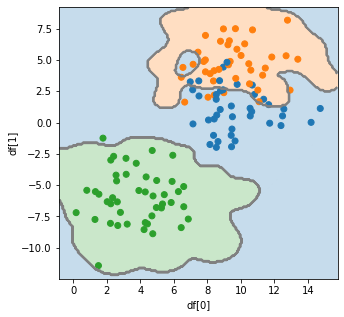

In [10]:
# 訓練データでSVM(ガウスカーネル法)の学習モデル作成
model = svm.SVC(kernel='rbf', gamma=1) # 非線形, ガンマ1
model.fit(X_train, y_train)

# テストデータで正解率を調べる
pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print('accuracy ' + str(score*100) + '%')

# テストデータで学習モデルの分類を描画
df = pd.DataFrame(X_test)
plot_boundary(model, df[0], df[1], y_test, "df[0]", "df[1]")

accuracy 72.8%


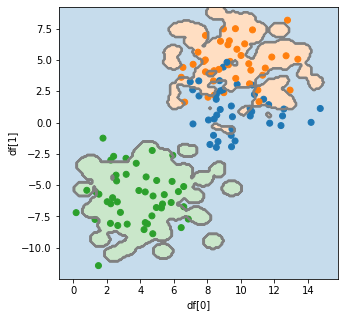

In [11]:
# 非線形, ガンマ10
model = svm.SVC(kernel='rbf', gamma=10)
model.fit(X_train, y_train)

pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print('accuracy ' + str(score*100) + '%')

df = pd.DataFrame(X_test)
plot_boundary(model, df[0], df[1], y_test, "df[0]", "df[1]")

accuracy 89.60000000000001%


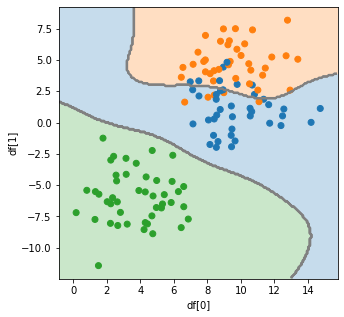

In [12]:
# 非線形, ガンマ0.1
model = svm.SVC(kernel='rbf', gamma=0.1)
model.fit(X_train, y_train)

pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print('accuracy ' + str(score*100) + '%')

df = pd.DataFrame(X_test)
plot_boundary(model, df[0], df[1], y_test, "df[0]", "df[1]")

accuracy 90.4%


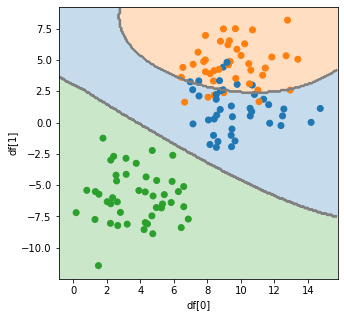

In [13]:
# 非線形, スケールモード
model = svm.SVC(kernel='rbf', gamma='scale')
model.fit(X_train, y_train)

pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print('accuracy ' + str(score*100) + '%')

df = pd.DataFrame(X_test)
plot_boundary(model, df[0], df[1], y_test, "df[0]", "df[1]")

accuracy 96.0%


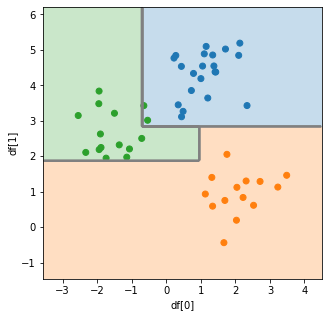

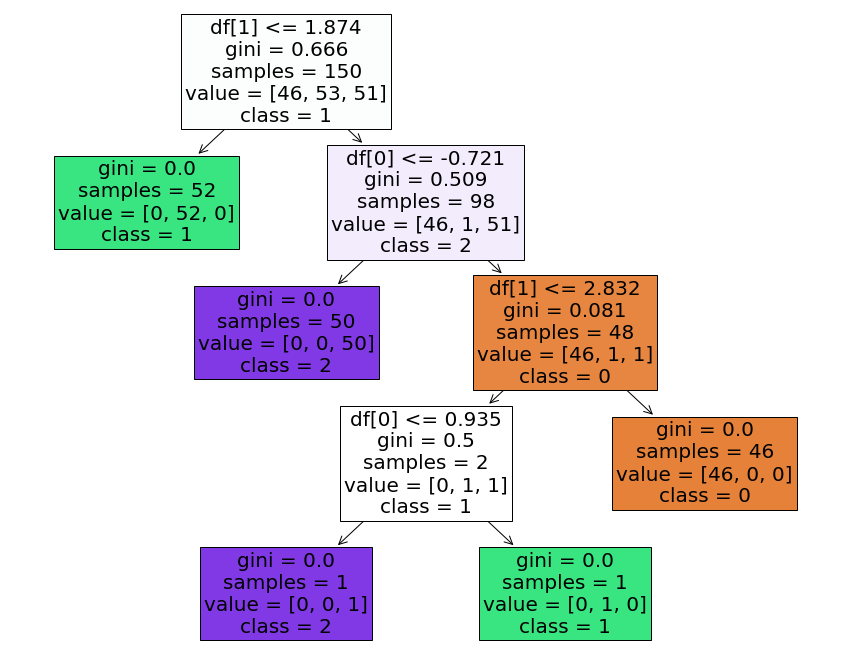

In [14]:
# --------
# 決定木
# --------

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# データセット
X, y = make_blobs(
    random_state = 0,
    n_features = 2,
    centers = 3,
    cluster_std = 0.6,
    n_samples = 200
)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 決定着の学習モデルを作成
model = DecisionTreeClassifier(
    max_depth = None,  # 深度
    random_state = 0
)
model.fit(X_train, y_train)

# 正解率を調べる
pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print('accuracy ' + str(score*100) + '%')

# グラフ描画
df = pd.DataFrame(X_test)
plot_boundary(model, df[0], df[1], y_test, "df[0]", "df[1]")

# ツリー構造描画
plt.figure(figsize=(15, 12))
plot_tree(
    model,
    fontsize = 20,
    filled = True,
    feature_names = ['df[0]', 'df[1]'],
    class_names = ['0', '1', '2']
)
plt.show()

accuracy 100.0%


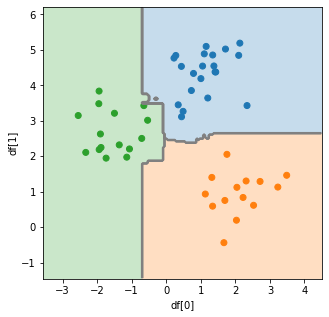

In [15]:
# --------
# ランダムフォレスト (複数の決定木の多数決)
# --------

from sklearn.ensemble import RandomForestClassifier

# ランダムフォレストの学習モデル
model = RandomForestClassifier()
model.fit(X_train, y_train)

# 正解率を調べる
pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print('accuracy ' + str(score*100) + '%')

# グラフ描画
df = pd.DataFrame(X_test)
plot_boundary(model, df[0], df[1], y_test, "df[0]", "df[1]")

accuracy 100.0%


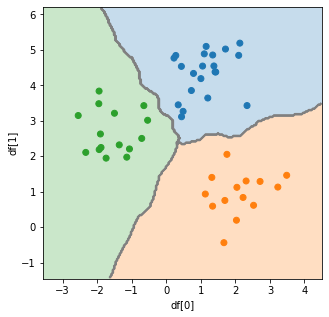

In [16]:
# --------
# k-NN (k-Nearest Neighbor, k近傍法)
# --------

from sklearn.neighbors import KNeighborsClassifier

# k近傍法の学習モデル
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# 正解率を調べる
pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print('accuracy ' + str(score*100) + '%')

# グラフ描画
df = pd.DataFrame(X_test)
plot_boundary(model, df[0], df[1], y_test, "df[0]", "df[1]")


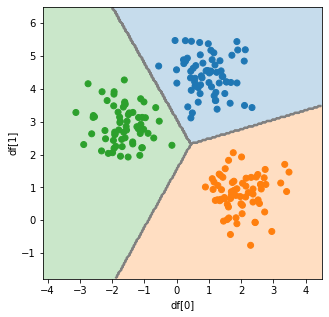

In [17]:
# --------
# k-means (k平均法, クラスタリング)
# --------
# 教師なし学習. 指定したグループ数にデータを分ける.

from sklearn.cluster import KMeans

# k平均法の学習モデル (3グループに分ける)
model = KMeans(n_clusters=3)
model.fit(X)

# 全データで分類状態を描画
df = pd.DataFrame(X)
plot_boundary(model, df[0], df[1], y, 'df[0]', 'df[1]')

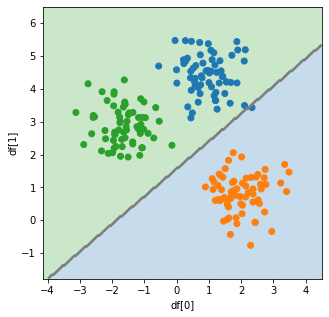

In [19]:
# 2グループに分けた場合
model = KMeans(n_clusters=2)
model.fit(X)

df = pd.DataFrame(X)
plot_boundary(model, df[0], df[1], y, 'df[0]', 'df[1]')